# Importing and Merging Data 

In [97]:
#importing data
import pandas as pd

sample_submission = pd.read_csv('/workspaces/scLee123/sample_submission.csv')

final_test_data = pd.read_csv('/workspaces/scLee123/Test.csv')

original_data = pd.read_csv('/workspaces/scLee123/Train.csv')#masked final+ 대출있는 사람

masked_final = pd.read_csv('/workspaces/scLee123/unlinked_masked_final.csv') # 대출있는사람이랑 연관된 이체? 

variables = pd.read_csv('/workspaces/scLee123/VariableDefinitions.csv')

In [89]:
variables

,Variable,Definition
0,CustomerId,Unique number identifying the customer on plat...
1,TransactionStartTime,Transaction start time
2,Value,Value of transaction
3,Amount,Value of Transaction with charges
4,TransactionId,Unique transaction identifier on platform
5,BatchId,Identifier for bulk transactions being done on...
6,SubscriptionId,You can have one account with multiple subscri...
7,CurrencyCode,Country currency
8,CountryCode,Numerical geographical code of country
9,ProviderId,Source provider of Item bought


# Explore the data


In [98]:
original_data.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,AmountLoan,Currency,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             2100 non-null   object 
 1   TransactionStartTime   2100 non-null   object 
 2   Value                  2100 non-null   float64
 3   Amount                 2100 non-null   float64
 4   TransactionId          2100 non-null   object 
 5   BatchId                2100 non-null   object 
 6   SubscriptionId         2100 non-null   object 
 7   CurrencyCode           2100 non-null   object 
 8   CountryCode            2100 non-null   int64  
 9   ProviderId             2100 non-null   object 
 10  ProductId              2100 non-null   object 
 11  ProductCategory        2100 non-null   object 
 12  ChannelId              2100 non-null   object 
 13  TransactionStatus      2100 non-null   int64  
 14  IssuedDateLoan         1488 non-null   object 
 15  Amou

In [100]:
masked_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         16327 non-null  object 
 1   BatchId               16327 non-null  object 
 2   CustomerId            16327 non-null  object 
 3   CurrencyCode          16327 non-null  object 
 4   CountryCode           16327 non-null  int64  
 5   ProviderId            16327 non-null  object 
 6   ProductId             16327 non-null  object 
 7   ProductCategory       16327 non-null  object 
 8   ChannelId             16327 non-null  object 
 9   Amount                16327 non-null  float64
 10  Value                 16327 non-null  float64
 11  TransactionStartTime  16327 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.5+ MB


In [101]:
original_data.describe()

,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
count,2.100000e+03,2.100000e+03,2100.0,2100.000000,1.488000e+03,1488.000000,1488.000000,1488.000000
mean,5.302947e+04,-5.291354e+04,256.0,0.708571,1.182725e+04,0.731855,0.982527,0.119624
std,1.539498e+05,1.539653e+05,0.0,0.454529,7.666506e+04,0.443143,0.131070,0.324630
min,1.000000e+02,-2.500000e+06,256.0,0.000000,5.000000e+01,0.000000,0.000000,0.000000
25%,1.000000e+03,-1.200000e+04,256.0,0.000000,1.113750e+03,0.000000,1.000000,0.000000
50%,3.500000e+03,-3.500000e+03,256.0,1.000000,2.800000e+03,1.000000,1.000000,0.000000
75%,1.200000e+04,-1.000000e+03,256.0,1.000000,1.050000e+04,1.000000,1.000000,0.000000
max,2.500000e+06,-1.000000e+02,256.0,1.000000,2.760000e+06,1.000000,1.000000,1.000000


In [81]:
# Drop Currencycode, CountryCode,ProviderId, ChannelId, Currency
#original_data['CurrencyCode'].value_counts()
#original_data['CountryCode'].value_counts()
original_data['LoanApplicationId'].value_counts()

LoanApplicationId
LoanApplicationId_825     1
LoanApplicationId_1140    1
LoanApplicationId_1386    1
LoanApplicationId_931     1
LoanApplicationId_985     1
                         ..
LoanApplicationId_1370    1
LoanApplicationId_198     1
LoanApplicationId_1372    1
LoanApplicationId_772     1
LoanApplicationId_1420    1
Name: count, Length: 478, dtype: int64

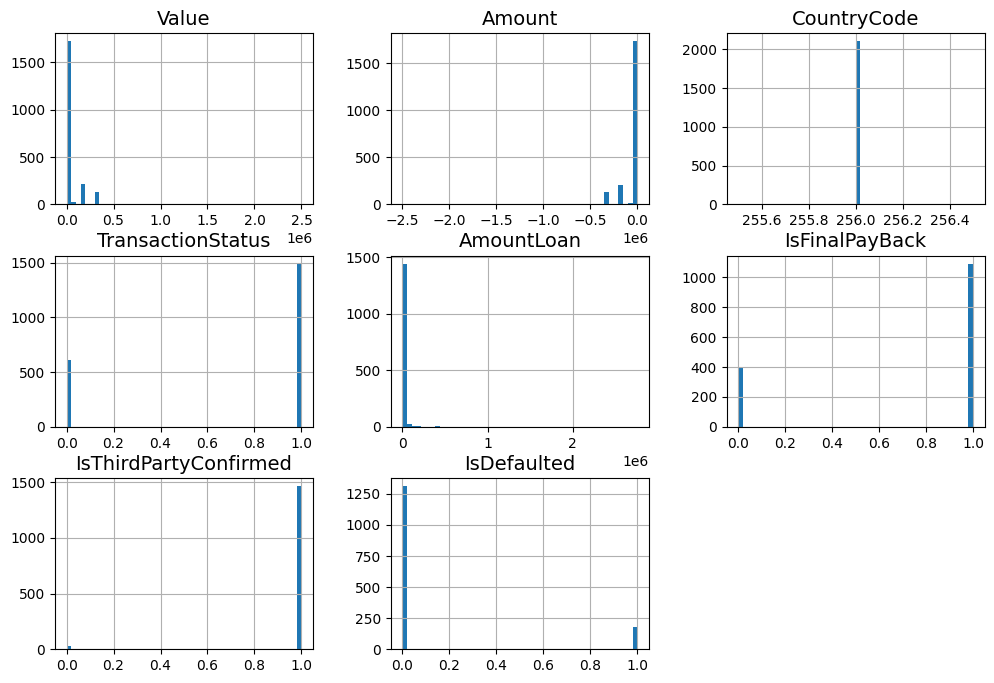

In [102]:
# Examine distributions using histograms
import matplotlib.pyplot as plt


plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

original_data.hist(bins=50, figsize=(12, 8))
plt.show()

# Data Presprocessing

Drop columns that are not corelated 

In [103]:
original_data

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,AmountLoan,Currency,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-30 21:55:10,2370.0,UGX,LoanId_293,2019-04-29 14:35:17,1.0,InvestorId_1,2019-04-29 21:55:06,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-30 23:54:06,5925.0,UGX,LoanId_1040,2019-04-29 14:32:37,1.0,InvestorId_1,2019-04-29 23:53:57,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,1,2019-03-31 05:40:09,7100.0,UGX,LoanId_1585,2019-06-15 06:20:05,1.0,InvestorId_1,2019-04-30 05:40:02,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 09:37:18,1733.0,UGX,LoanId_1314,2019-04-23 15:44:15,1.0,InvestorId_1,2019-04-30 09:37:15,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [104]:
#Finding the columns that only has one unique value.
unique_counts = original_data.nunique()

single_unique_columns = unique_counts[unique_counts == 1].index.tolist()

print(single_unique_columns)

['CurrencyCode', 'CountryCode', 'ProviderId', 'ChannelId', 'Currency']


In [105]:
# making training dataset with out the values that has only one unique value.
train_data = original_data.drop(['CurrencyCode','CountryCode','ProviderId','ChannelId','Currency'],axis=1)

In [106]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             2100 non-null   object 
 1   TransactionStartTime   2100 non-null   object 
 2   Value                  2100 non-null   float64
 3   Amount                 2100 non-null   float64
 4   TransactionId          2100 non-null   object 
 5   BatchId                2100 non-null   object 
 6   SubscriptionId         2100 non-null   object 
 7   ProductId              2100 non-null   object 
 8   ProductCategory        2100 non-null   object 
 9   TransactionStatus      2100 non-null   int64  
 10  IssuedDateLoan         1488 non-null   object 
 11  AmountLoan             1488 non-null   float64
 12  LoanId                 1488 non-null   object 
 13  PaidOnDate             1488 non-null   object 
 14  IsFinalPayBack         1488 non-null   float64
 15  Inve

In [107]:
corr_matrix = train_data.corr(numeric_only=True)

corr_matrix["IsDefaulted"].sort_values(ascending=False)



IsDefaulted              1.000000
Value                    0.333220
AmountLoan               0.031049
IsThirdPartyConfirmed    0.017547
Amount                  -0.333401
IsFinalPayBack          -0.594954
TransactionStatus             NaN
Name: IsDefaulted, dtype: float64

# Handling NAs

In [108]:
import pandas as pd

# Example DataFrame
# original_data = pd.DataFrame(...)

# Null 값이 있는 컬럼 찾기
null_columns = train_data.columns[train_data.isnull().any()].tolist()

print(null_columns)

['IssuedDateLoan', 'AmountLoan', 'LoanId', 'PaidOnDate', 'IsFinalPayBack', 'InvestorId', 'DueDate', 'LoanApplicationId', 'PayBackId', 'ThirdPartyId', 'IsThirdPartyConfirmed', 'IsDefaulted']


In [109]:
pd.set_option('display.max_columns', None) # show every columns
train_data = train_data.drop(train_data[train_data['TransactionStatus'] == 0].index) #drop every rows that transactionstatus ==0
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1488 entries, 9 to 2099
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             1488 non-null   object 
 1   TransactionStartTime   1488 non-null   object 
 2   Value                  1488 non-null   float64
 3   Amount                 1488 non-null   float64
 4   TransactionId          1488 non-null   object 
 5   BatchId                1488 non-null   object 
 6   SubscriptionId         1488 non-null   object 
 7   ProductId              1488 non-null   object 
 8   ProductCategory        1488 non-null   object 
 9   TransactionStatus      1488 non-null   int64  
 10  IssuedDateLoan         1488 non-null   object 
 11  AmountLoan             1488 non-null   float64
 12  LoanId                 1488 non-null   object 
 13  PaidOnDate             1488 non-null   object 
 14  IsFinalPayBack         1488 non-null   float64
 15  InvestorI

In [111]:
# Drop 9 rows with nan
train_data = train_data.dropna()
train_data.isnull().sum()

CustomerId               0
TransactionStartTime     0
Value                    0
Amount                   0
TransactionId            0
BatchId                  0
SubscriptionId           0
ProductId                0
ProductCategory          0
TransactionStatus        0
IssuedDateLoan           0
AmountLoan               0
LoanId                   0
PaidOnDate               0
IsFinalPayBack           0
InvestorId               0
DueDate                  0
LoanApplicationId        0
PayBackId                0
ThirdPartyId             0
IsThirdPartyConfirmed    0
IsDefaulted              0
dtype: int64

# Correlation analysis and column dropping

In [112]:
corr_matrix = train_data.corr(numeric_only=True)

corr_matrix["IsDefaulted"].sort_values(ascending=False)

IsDefaulted              1.000000
Value                    0.331797
AmountLoan               0.025702
IsThirdPartyConfirmed    0.008807
Amount                  -0.331978
IsFinalPayBack          -0.599953
TransactionStatus             NaN
Name: IsDefaulted, dtype: float64

In [114]:
train_data.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,ProductId,ProductCategory,TransactionStatus,IssuedDateLoan,AmountLoan,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
15,CustomerId_233,2018-10-22 16:04:25,5000.0,-5000.0,TransactionId_2632,BatchId_775,SubscriptionId_4,ProductId_7,airtime,1,2018-10-22 16:04:22,5375.0,LoanId_317,2018-10-30 06:49:57,1.0,InvestorId_3,2018-11-21 16:03:32,LoanApplicationId_1629,PayBackId_1719,ThirdPartyId_1010,0.0,0.0
17,CustomerId_305,2018-10-23 13:12:23,500.0,-500.0,TransactionId_1297,BatchId_2016,SubscriptionId_1,ProductId_7,airtime,1,2018-10-23 13:12:21,543.0,LoanId_1619,2018-10-23 13:18:42,1.0,InvestorId_2,2018-11-22 13:12:16,LoanApplicationId_136,PayBackId_725,ThirdPartyId_1566,0.0,0.0
18,CustomerId_27,2018-10-23 15:20:58,1000.0,-1000.0,TransactionId_1367,BatchId_1675,SubscriptionId_1,ProductId_7,airtime,1,2018-10-23 15:20:55,1085.0,LoanId_1438,2018-10-23 15:26:58,1.0,InvestorId_2,2018-11-22 15:20:53,LoanApplicationId_1171,PayBackId_1085,ThirdPartyId_1265,0.0,0.0
19,CustomerId_27,2018-10-23 15:31:27,500.0,-500.0,TransactionId_871,BatchId_2449,SubscriptionId_1,ProductId_7,airtime,1,2018-10-24 06:34:00,543.0,LoanId_1304,2018-10-24 06:38:49,1.0,InvestorId_2,2018-11-23 06:33:57,LoanApplicationId_702,PayBackId_763,ThirdPartyId_1962,0.0,0.0
20,CustomerId_27,2018-10-24 06:56:02,500.0,-500.0,TransactionId_1019,BatchId_1564,SubscriptionId_1,ProductId_4,data_bundles,1,2018-10-24 06:56:00,543.0,LoanId_1436,2018-10-24 07:01:48,1.0,InvestorId_2,2018-11-23 06:55:58,LoanApplicationId_508,PayBackId_1228,ThirdPartyId_2008,0.0,0.0


In [115]:
#Drop every ids and codes or low correlated values from the training set
train_data2 = train_data.drop(['BatchId', 'SubscriptionId', 'TransactionStatus', 'LoanId', 'InvestorId', 'LoanApplicationId', 'PayBackId', 'ThirdPartyId', 'ProductId'],axis = 1)

train_data2

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,ProductId,ProductCategory,IssuedDateLoan,AmountLoan,PaidOnDate,IsFinalPayBack,DueDate,IsThirdPartyConfirmed,IsDefaulted
15,CustomerId_233,2018-10-22 16:04:25,5000.0,-5000.0,TransactionId_2632,ProductId_7,airtime,2018-10-22 16:04:22,5375.0,2018-10-30 06:49:57,1.0,2018-11-21 16:03:32,0.0,0.0
17,CustomerId_305,2018-10-23 13:12:23,500.0,-500.0,TransactionId_1297,ProductId_7,airtime,2018-10-23 13:12:21,543.0,2018-10-23 13:18:42,1.0,2018-11-22 13:12:16,0.0,0.0
18,CustomerId_27,2018-10-23 15:20:58,1000.0,-1000.0,TransactionId_1367,ProductId_7,airtime,2018-10-23 15:20:55,1085.0,2018-10-23 15:26:58,1.0,2018-11-22 15:20:53,0.0,0.0
19,CustomerId_27,2018-10-23 15:31:27,500.0,-500.0,TransactionId_871,ProductId_7,airtime,2018-10-24 06:34:00,543.0,2018-10-24 06:38:49,1.0,2018-11-23 06:33:57,0.0,0.0
20,CustomerId_27,2018-10-24 06:56:02,500.0,-500.0,TransactionId_1019,ProductId_4,data_bundles,2018-10-24 06:56:00,543.0,2018-10-24 07:01:48,1.0,2018-11-23 06:55:58,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,ProductId_8,data_bundles,2019-03-30 21:55:10,2370.0,2019-04-29 14:35:17,1.0,2019-04-29 21:55:06,1.0,0.0
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,ProductId_7,airtime,2019-03-30 23:54:06,5925.0,2019-04-29 14:32:37,1.0,2019-04-29 23:53:57,1.0,0.0
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,ProductId_3,airtime,2019-03-31 05:40:09,7100.0,2019-06-15 06:20:05,1.0,2019-04-30 05:40:02,1.0,0.0
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,ProductId_8,data_bundles,2019-03-31 09:37:18,1733.0,2019-04-23 15:44:15,1.0,2019-04-30 09:37:15,1.0,0.0


In [ ]:
train_data.sort_values(['CustomerId']).head(50)


,CustomerId,TransactionStartTime,Value,Amount,TransactionId,ProductCategory,IssuedDateLoan,InvestorId,IsDefaulted
114,0,49,2000.0,-2000.0,194,1,50,0,0.0
1503,1,870,192000.0,-192000.0,19,4,875,1,1.0
1504,1,870,192000.0,-192000.0,19,4,875,1,1.0
1505,1,870,192000.0,-192000.0,19,4,875,1,1.0
1509,1,870,192000.0,-192000.0,19,4,875,1,1.0
1508,1,870,192000.0,-192000.0,19,4,875,1,1.0
1506,1,870,192000.0,-192000.0,19,4,875,1,1.0
1507,1,870,192000.0,-192000.0,19,4,875,1,1.0
1800,2,977,192000.0,-192000.0,1129,4,982,1,0.0
1801,2,977,192000.0,-192000.0,1129,4,982,1,0.0


In [ ]:
# drop columns in masked_final too 
masked_final = masked_final.drop(['BatchId', 'CurrencyCode', 'CountryCode', 'ProviderId','ChannelId'], axis = 1)


,TransactionId,CustomerId,ProductId,ProductCategory,Amount,Value,TransactionStartTime
0,TransactionId_18876,CustomerId_250,ProductId_8,data_bundles,2000.0,2000.0,30/6/19 22:57:49
1,TransactionId_15089,CustomerId_423,ProductId_7,airtime,800.0,800.0,30/6/19 22:39:11
2,TransactionId_9561,CustomerId_423,ProductId_10,financial_services,2000.0,2000.0,30/6/19 22:35:53
3,TransactionId_3635,CustomerId_316,ProductId_3,airtime,1000.0,1000.0,30/6/19 19:47:00
4,TransactionId_3104,CustomerId_193,ProductId_1,airtime,5000.0,5000.0,30/6/19 19:11:01
...,...,...,...,...,...,...,...
16322,TransactionId_11472,CustomerId_282,ProductId_3,airtime,1000.0,1000.0,1/1/19 6:28:43
16323,TransactionId_18689,CustomerId_282,ProductId_8,data_bundles,2000.0,2000.0,1/1/19 5:10:25
16324,TransactionId_17879,CustomerId_282,ProductId_3,airtime,2000.0,2000.0,1/1/19 4:54:08
16325,TransactionId_6532,CustomerId_180,ProductId_3,airtime,2000.0,2000.0,1/1/19 0:46:25


In [ ]:
train_data.sort_values(['CustomerId']).head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,ProductCategory,IssuedDateLoan,InvestorId,IsDefaulted
114,0,49,2000.0,-2000.0,194,1,50,0,0.0
1503,1,870,192000.0,-192000.0,19,4,875,1,1.0
1504,1,870,192000.0,-192000.0,19,4,875,1,1.0
1505,1,870,192000.0,-192000.0,19,4,875,1,1.0
1509,1,870,192000.0,-192000.0,19,4,875,1,1.0


In [ ]:
masked_final.sort_values(['CustomerId']).head(80)


,TransactionId,CustomerId,ProductId,ProductCategory,Amount,Value,TransactionStartTime
6533,TransactionId_14804,CustomerId_1,ProductId_3,airtime,1000.0,1000.0,3/4/19 18:35:06
6547,TransactionId_7847,CustomerId_1,ProductId_3,airtime,1000.0,1000.0,3/4/19 17:55:43
6548,TransactionId_7833,CustomerId_1,ProductId_3,airtime,1000.0,1000.0,3/4/19 17:49:35
6549,TransactionId_18550,CustomerId_1,ProductId_3,airtime,1000.0,1000.0,3/4/19 17:41:56
11440,TransactionId_14051,CustomerId_1,ProductId_5,tv,180000.0,185400.0,13/2/19 8:18:26
...,...,...,...,...,...,...,...
12270,TransactionId_15898,CustomerId_103,ProductId_3,airtime,1000.0,1000.0,6/2/19 7:33:58
15366,TransactionId_4311,CustomerId_103,ProductId_4,data_bundles,1000.0,1000.0,12/1/19 20:00:25
16041,TransactionId_7869,CustomerId_103,ProductId_3,airtime,10000.0,10000.0,4/1/19 17:57:17
15354,TransactionId_4708,CustomerId_103,ProductId_3,airtime,1000.0,1000.0,13/1/19 4:22:33


In [ ]:
# masked final 사용법
# train 데이터셋에 customer id 별로 masked_final에 거래 횟수, 거래 가격 등으로 새로운 데이터 뽑아서 쓸 수 있어.
#그거 적용한 모델로 테스트 할 수 있어?

masked_final[masked_final['CustomerId'].isin(['CustomerId_258'])]

,TransactionId,BatchId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime
6460,TransactionId_10169,BatchId_11809,CustomerId_258,UGX,256,ProviderId_4,ProductId_10,financial_services,ChannelId_3,10000.0,10000.0,4/4/19 18:40:22


In [ ]:
# 두 데이터셋의 'customer_id' 컬럼을 set으로 변환
masked_final_set = set(masked_final['CustomerId'])
train_data_set = set(train_data['CustomerId'])

# 두 set의 교집합을 찾아 겹치는 값들을 구함
overlapping_values = masked_final_set.intersection(train_data_set)

len(overlapping_values)

178

In [ ]:
len(masked_final['CustomerId'].unique())

282

In [ ]:

# customer id 별 쇼핑 횟수, 가격, 시간 
masked_final

,TransactionId,BatchId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime
0,TransactionId_18876,BatchId_7899,CustomerId_250,UGX,256,ProviderId_2,ProductId_8,data_bundles,ChannelId_3,2000.0,2000.0,30/6/19 22:57:49
1,TransactionId_15089,BatchId_8829,CustomerId_423,UGX,256,ProviderId_5,ProductId_7,airtime,ChannelId_3,800.0,800.0,30/6/19 22:39:11
2,TransactionId_9561,BatchId_15250,CustomerId_423,UGX,256,ProviderId_2,ProductId_10,financial_services,ChannelId_3,2000.0,2000.0,30/6/19 22:35:53
3,TransactionId_3635,BatchId_14442,CustomerId_316,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_3,1000.0,1000.0,30/6/19 19:47:00
4,TransactionId_3104,BatchId_5171,CustomerId_193,UGX,256,ProviderId_5,ProductId_1,airtime,ChannelId_3,5000.0,5000.0,30/6/19 19:11:01
...,...,...,...,...,...,...,...,...,...,...,...,...
16322,TransactionId_11472,BatchId_12998,CustomerId_282,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000.0,1/1/19 6:28:43
16323,TransactionId_18689,BatchId_10292,CustomerId_282,UGX,256,ProviderId_5,ProductId_8,data_bundles,ChannelId_3,2000.0,2000.0,1/1/19 5:10:25
16324,TransactionId_17879,BatchId_16972,CustomerId_282,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,2000.0,2000.0,1/1/19 4:54:08
16325,TransactionId_6532,BatchId_11541,CustomerId_180,UGX,256,ProviderId_3,ProductId_3,airtime,ChannelId_3,2000.0,2000.0,1/1/19 0:46:25


In [ ]:
train_data

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,ProductId,ProductCategory,TransactionStatus,IssuedDateLoan,AmountLoan,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
15,CustomerId_233,2018-10-22 16:04:25,5000.0,-5000.0,TransactionId_2632,BatchId_775,SubscriptionId_4,ProductId_7,airtime,1,2018-10-22 16:04:22,5375.0,LoanId_317,2018-10-30 06:49:57,1.0,InvestorId_3,2018-11-21 16:03:32,LoanApplicationId_1629,PayBackId_1719,ThirdPartyId_1010,0.0,0.0
17,CustomerId_305,2018-10-23 13:12:23,500.0,-500.0,TransactionId_1297,BatchId_2016,SubscriptionId_1,ProductId_7,airtime,1,2018-10-23 13:12:21,543.0,LoanId_1619,2018-10-23 13:18:42,1.0,InvestorId_2,2018-11-22 13:12:16,LoanApplicationId_136,PayBackId_725,ThirdPartyId_1566,0.0,0.0
18,CustomerId_27,2018-10-23 15:20:58,1000.0,-1000.0,TransactionId_1367,BatchId_1675,SubscriptionId_1,ProductId_7,airtime,1,2018-10-23 15:20:55,1085.0,LoanId_1438,2018-10-23 15:26:58,1.0,InvestorId_2,2018-11-22 15:20:53,LoanApplicationId_1171,PayBackId_1085,ThirdPartyId_1265,0.0,0.0
19,CustomerId_27,2018-10-23 15:31:27,500.0,-500.0,TransactionId_871,BatchId_2449,SubscriptionId_1,ProductId_7,airtime,1,2018-10-24 06:34:00,543.0,LoanId_1304,2018-10-24 06:38:49,1.0,InvestorId_2,2018-11-23 06:33:57,LoanApplicationId_702,PayBackId_763,ThirdPartyId_1962,0.0,0.0
20,CustomerId_27,2018-10-24 06:56:02,500.0,-500.0,TransactionId_1019,BatchId_1564,SubscriptionId_1,ProductId_4,data_bundles,1,2018-10-24 06:56:00,543.0,LoanId_1436,2018-10-24 07:01:48,1.0,InvestorId_2,2018-11-23 06:55:58,LoanApplicationId_508,PayBackId_1228,ThirdPartyId_2008,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,ProductId_8,data_bundles,1,2019-03-30 21:55:10,2370.0,LoanId_293,2019-04-29 14:35:17,1.0,InvestorId_1,2019-04-29 21:55:06,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,ProductId_7,airtime,1,2019-03-30 23:54:06,5925.0,LoanId_1040,2019-04-29 14:32:37,1.0,InvestorId_1,2019-04-29 23:53:57,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,ProductId_3,airtime,1,2019-03-31 05:40:09,7100.0,LoanId_1585,2019-06-15 06:20:05,1.0,InvestorId_1,2019-04-30 05:40:02,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,ProductId_8,data_bundles,1,2019-03-31 09:37:18,1733.0,LoanId_1314,2019-04-23 15:44:15,1.0,InvestorId_1,2019-04-30 09:37:15,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [ ]:
common_columns = final_test_data.columns.intersection(train_data.columns)
common_columns

Index(['CustomerId', 'TransactionStartTime', 'Value', 'Amount',
       'TransactionId', 'BatchId', 'SubscriptionId', 'ProductId',
       'ProductCategory', 'TransactionStatus', 'IssuedDateLoan', 'LoanId',
       'InvestorId', 'LoanApplicationId', 'ThirdPartyId'],
      dtype='object')

In [ ]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            905 non-null    object 
 1   TransactionStartTime  905 non-null    object 
 2   Value                 905 non-null    float64
 3   Amount                905 non-null    float64
 4   TransactionId         905 non-null    object 
 5   BatchId               905 non-null    object 
 6   SubscriptionId        905 non-null    object 
 7   CurrencyCode          905 non-null    object 
 8   CountryCode           905 non-null    int64  
 9   ProviderId            905 non-null    object 
 10  ProductId             905 non-null    object 
 11  ProductCategory       905 non-null    object 
 12  ChannelId             905 non-null    object 
 13  TransactionStatus     905 non-null    int64  
 14  IssuedDateLoan        478 non-null    object 
 15  LoanId                4

In [ ]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             2100 non-null   object 
 1   TransactionStartTime   2100 non-null   object 
 2   Value                  2100 non-null   float64
 3   Amount                 2100 non-null   float64
 4   TransactionId          2100 non-null   object 
 5   BatchId                2100 non-null   object 
 6   SubscriptionId         2100 non-null   object 
 7   CurrencyCode           2100 non-null   object 
 8   CountryCode            2100 non-null   int64  
 9   ProviderId             2100 non-null   object 
 10  ProductId              2100 non-null   object 
 11  ProductCategory        2100 non-null   object 
 12  ChannelId              2100 non-null   object 
 13  TransactionStatus      2100 non-null   int64  
 14  IssuedDateLoan         1488 non-null   object 
 15  Amou

In [ ]:
#checking columns with na values
columns_with_nan = original_data.columns[original_data.isna().any()].tolist()
columns_with_nan

['IssuedDateLoan',
 'AmountLoan',
 'Currency',
 'LoanId',
 'PaidOnDate',
 'IsFinalPayBack',
 'InvestorId',
 'DueDate',
 'LoanApplicationId',
 'PayBackId',
 'ThirdPartyId',
 'IsThirdPartyConfirmed',
 'IsDefaulted']

In [ ]:
# drop all rows containing na values
original_data = original_data.dropna()
masked_final = masked_final.dropna()

In [ ]:
# checking dataset
original_data.info()
masked_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1479 entries, 15 to 2099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             1479 non-null   object 
 1   TransactionStartTime   1479 non-null   object 
 2   Value                  1479 non-null   float64
 3   Amount                 1479 non-null   float64
 4   TransactionId          1479 non-null   object 
 5   BatchId                1479 non-null   object 
 6   SubscriptionId         1479 non-null   object 
 7   CurrencyCode           1479 non-null   object 
 8   CountryCode            1479 non-null   int64  
 9   ProviderId             1479 non-null   object 
 10  ProductId              1479 non-null   object 
 11  ProductCategory        1479 non-null   object 
 12  ChannelId              1479 non-null   object 
 13  TransactionStatus      1479 non-null   int64  
 14  IssuedDateLoan         1479 non-null   object 
 15  AmountLo

In [ ]:
masked_final

,TransactionId,BatchId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime
0,TransactionId_18876,BatchId_7899,CustomerId_250,UGX,256,ProviderId_2,ProductId_8,data_bundles,ChannelId_3,2000.0,2000.0,30/6/19 22:57:49
1,TransactionId_15089,BatchId_8829,CustomerId_423,UGX,256,ProviderId_5,ProductId_7,airtime,ChannelId_3,800.0,800.0,30/6/19 22:39:11
2,TransactionId_9561,BatchId_15250,CustomerId_423,UGX,256,ProviderId_2,ProductId_10,financial_services,ChannelId_3,2000.0,2000.0,30/6/19 22:35:53
3,TransactionId_3635,BatchId_14442,CustomerId_316,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_3,1000.0,1000.0,30/6/19 19:47:00
4,TransactionId_3104,BatchId_5171,CustomerId_193,UGX,256,ProviderId_5,ProductId_1,airtime,ChannelId_3,5000.0,5000.0,30/6/19 19:11:01
...,...,...,...,...,...,...,...,...,...,...,...,...
16322,TransactionId_11472,BatchId_12998,CustomerId_282,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000.0,1/1/19 6:28:43
16323,TransactionId_18689,BatchId_10292,CustomerId_282,UGX,256,ProviderId_5,ProductId_8,data_bundles,ChannelId_3,2000.0,2000.0,1/1/19 5:10:25
16324,TransactionId_17879,BatchId_16972,CustomerId_282,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,2000.0,2000.0,1/1/19 4:54:08
16325,TransactionId_6532,BatchId_11541,CustomerId_180,UGX,256,ProviderId_3,ProductId_3,airtime,ChannelId_3,2000.0,2000.0,1/1/19 0:46:25


In [ ]:
#masked에 있는 transaction id original에 있나 확인
value_exists = 'TransactionId_1683' in original_data['TransactionId'].values
value_exists

False

In [ ]:
original_data

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,AmountLoan,Currency,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
15,CustomerId_233,2018-10-22 16:04:25,5000.0,-5000.0,TransactionId_2632,BatchId_775,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-22 16:04:22,5375.0,UGX,LoanId_317,2018-10-30 06:49:57,1.0,InvestorId_3,2018-11-21 16:03:32,LoanApplicationId_1629,PayBackId_1719,ThirdPartyId_1010,0.0,0.0
17,CustomerId_305,2018-10-23 13:12:23,500.0,-500.0,TransactionId_1297,BatchId_2016,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-23 13:12:21,543.0,UGX,LoanId_1619,2018-10-23 13:18:42,1.0,InvestorId_2,2018-11-22 13:12:16,LoanApplicationId_136,PayBackId_725,ThirdPartyId_1566,0.0,0.0
18,CustomerId_27,2018-10-23 15:20:58,1000.0,-1000.0,TransactionId_1367,BatchId_1675,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-23 15:20:55,1085.0,UGX,LoanId_1438,2018-10-23 15:26:58,1.0,InvestorId_2,2018-11-22 15:20:53,LoanApplicationId_1171,PayBackId_1085,ThirdPartyId_1265,0.0,0.0
19,CustomerId_27,2018-10-23 15:31:27,500.0,-500.0,TransactionId_871,BatchId_2449,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-24 06:34:00,543.0,UGX,LoanId_1304,2018-10-24 06:38:49,1.0,InvestorId_2,2018-11-23 06:33:57,LoanApplicationId_702,PayBackId_763,ThirdPartyId_1962,0.0,0.0
20,CustomerId_27,2018-10-24 06:56:02,500.0,-500.0,TransactionId_1019,BatchId_1564,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_4,data_bundles,ChannelId_1,1,2018-10-24 06:56:00,543.0,UGX,LoanId_1436,2018-10-24 07:01:48,1.0,InvestorId_2,2018-11-23 06:55:58,LoanApplicationId_508,PayBackId_1228,ThirdPartyId_2008,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-30 21:55:10,2370.0,UGX,LoanId_293,2019-04-29 14:35:17,1.0,InvestorId_1,2019-04-29 21:55:06,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-30 23:54:06,5925.0,UGX,LoanId_1040,2019-04-29 14:32:37,1.0,InvestorId_1,2019-04-29 23:53:57,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,1,2019-03-31 05:40:09,7100.0,UGX,LoanId_1585,2019-06-15 06:20:05,1.0,InvestorId_1,2019-04-30 05:40:02,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 09:37:18,1733.0,UGX,LoanId_1314,2019-04-23 15:44:15,1.0,InvestorId_1,2019-04-30 09:37:15,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [ ]:
# original data에 masked_final customer id 있는 거 찾고 그걸로 분석하기
# test dataset에 있는 컬럼만


filtered_df_B =  original_data[original_data['CustomerId'].isin(masked_final['CustomerId'])]
train_data = original_data[final_test_data.columns] 
train_data['IsDefaulted'] = original_data['IsDefaulted']


/tmp/ipykernel_1668/3566997325.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['IsDefaulted'] = original_data['IsDefaulted']


In [ ]:
# train data object형 인코딩
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = label_encoder.fit_transform(train_data[col])

/tmp/ipykernel_1668/3802688035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = label_encoder.fit_transform(train_data[col])
/tmp/ipykernel_1668/3802688035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = label_encoder.fit_transform(train_data[col])
/tmp/ipykernel_1668/3802688035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1479 entries, 15 to 2099
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            1479 non-null   int64  
 1   TransactionStartTime  1479 non-null   int64  
 2   Value                 1479 non-null   float64
 3   Amount                1479 non-null   float64
 4   TransactionId         1479 non-null   int64  
 5   BatchId               1479 non-null   int64  
 6   SubscriptionId        1479 non-null   int64  
 7   CurrencyCode          1479 non-null   int64  
 8   CountryCode           1479 non-null   int64  
 9   ProviderId            1479 non-null   int64  
 10  ProductId             1479 non-null   int64  
 11  ProductCategory       1479 non-null   int64  
 12  ChannelId             1479 non-null   int64  
 13  TransactionStatus     1479 non-null   int64  
 14  IssuedDateLoan        1479 non-null   int64  
 15  LoanId                147

In [ ]:
# 종속 변수 설정
target = 'IsDefaulted'

# 상관 계수 계산
correlations = train_data.corrwith(train_data[target])

# 상관 계수가 높은 순으로 정렬
correlations_sorted = correlations.sort_values(ascending=False)

# 출력
print(correlations_sorted)

IsDefaulted             1.000000
InvestorId              0.481784
ProductCategory         0.405467
Value                   0.331797
IssuedDateLoan          0.240347
TransactionStartTime    0.240120
ThirdPartyId            0.046628
LoanId                  0.013313
BatchId                 0.009910
LoanApplicationId      -0.006667
TransactionId          -0.059124
SubscriptionId         -0.092491
CustomerId             -0.105362
ProductId              -0.191720
Amount                 -0.331978
CurrencyCode                 NaN
CountryCode                  NaN
ProviderId                   NaN
ChannelId                    NaN
TransactionStatus            NaN
dtype: float64


/home/codespace/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/codespace/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Splitting the data into independent and dependent variables
X = train_data.drop(['IsDefaulted','ThirdPartyId','LoanId','BatchId','LoanApplicationId',
                    'TransactionId', 'SubscriptionId','CustomerId','ProductId',
                    'CurrencyCode','CountryCode','ProviderId','ChannelId',
                    'TransactionStatus'],axis=1)  # all columns except 'IsDefaulted'
y = train_data['IsDefaulted']  # Only the 'IsDefaulted' column

# Convert categorical variables to dummy variables (one-hot encoding)
#X = pd.get_dummies(X, drop_first=True)

# 종속 변수 설정
target = 'IsDefaulted'

# 상관 계수 계산
correlations = X.corrwith(y)

# 상관 계수가 높은 순으로 정렬
correlations_sorted = correlations.sort_values(ascending=False)

# 출력
print(correlations_sorted)

InvestorId              0.481784
ProductCategory         0.405467
Value                   0.331797
IssuedDateLoan          0.240347
TransactionStartTime    0.240120
Amount                 -0.331978
dtype: float64


In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Creating and training the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.06962863219124912
R^2 Score: 0.3237916991638561


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming train_data is your DataFrame
# X and y are defined as you've described

X = train_data.drop('IsDefaulted', axis=1)  # Independent variables
y = train_data['IsDefaulted']  # Dependent variable

# Add a constant to the model (the intercept term)
X = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Summary of the model
summary = results.summary()

# Convert summary tables to DataFrame
tables = summary.tables[1]
column_names = tables.data[0]
data = tables.data[1:]
report = pd.DataFrame(data, columns=column_names)

print(report)

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
# 데이터셋 합치고 데이터 전처리(NA 값이랑, 문자열 처리)
# 
# train 데이터 셋에서 IsDefaulted이랑 나머지랑 분류
# train data set -> train, test data로 split 하고 학습
#

In [ ]:
# Null값 제거
# 모든컬럼 수치화
# 곤련있는 컬럼들로만 모델 만들기
# train test split 으로 모델 평가
# 